In [2]:
#!/usr/bin/env python
# coding: utf-8

In [3]:

import sys

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

sys.path.insert(0, '/Users/lhao/Documents/Git/py_Halo-GEM/ecpy')
import pickle

# from curate_kcat import *

# from multiprocessing import Process,cpu_count,Manager


In [4]:

dffrac_pro = pd.read_csv('../Results/protein_abundance_go_slim_level_uniq_asc.csv', index_col=0)

dffrac_mRNA = pd.read_excel('../proteomics/mRNA_abundance_go_slim-20201124.xlsx', sheet_name='mRNA', index_col=0,
                            header=0)
dftot = pd.read_csv('../proteomics/total_protein_abandance_mean.csv', index_col=0)

/Users/lhao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lhao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lhao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lhao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


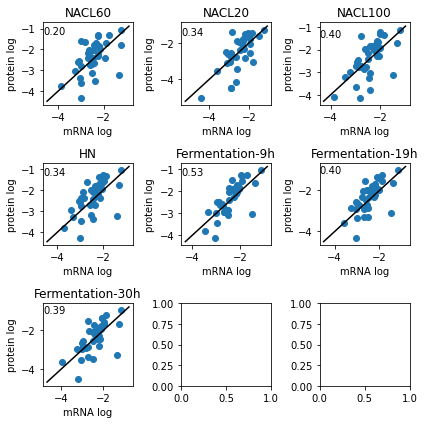

In [5]:
# dffrac_pro
# dffrac_mRNA

fig, axs = plt.subplots(3, 3, figsize=(6, 6))
lim = [-1, 9]

for i, cond_id in enumerate(dftot.index):
    if cond_id == 'MU':
        continue
    ax_i = axs[i // 3, i % 3]
    x_i = np.log10(dffrac_mRNA['MassFrac_' + cond_id])
    y_i = np.log10(dffrac_pro['MassFrac_' + cond_id])
    ax_i.scatter(x_i, y_i)
    # r2_score(x_i.values, y_i.values)
    lim = [min(ax_i.get_ylim()[0], ax_i.get_xlim()[0]), max(ax_i.get_ylim()[1], ax_i.get_xlim()[1])]

    ax_i.plot(lim, lim, 'black')

    y_i_r = y_i.values
    x_i_r = x_i.values
    y_i_r = y_i.values[(y_i.values > -5) & (x_i.values > -5)]
    x_i_r = x_i.values[(y_i.values > -5) & (x_i.values > -5)]
    ax_i.text(ax_i.get_xlim()[0], ax_i.get_ylim()[1] * 1.8, "%.2f" % r2_score(y_i_r, x_i_r))

    ax_i.set_xlabel('mRNA log')
    ax_i.set_ylabel('protein log')
    ax_i.set_title(cond_id)
plt.tight_layout()
plt.show()

coeff_means: 1.651567 
coeff_std: 0.071373


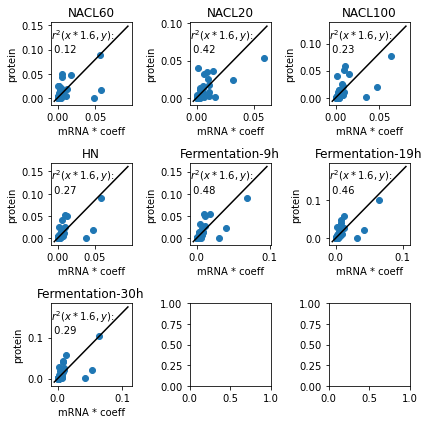

In [6]:
# y = 1.6x —+ stv
# dffrac_mRNA
coeff_dic = {'NACL60': 1.586596438, 'NACL20': 1.572338571, 'NACL100': 1.635750178,
             'HN': 1.702987161, 'Fermentation-9h': 1.6792188,
             'Fermentation-19h': 1.787498847, 'Fermentation-30h': 1.596578543, }

coeff_means = np.mean(list(coeff_dic.values()))
coeff_std = np.std(list(coeff_dic.values()))
print('coeff_means: %f \ncoeff_std: %f' % (coeff_means, coeff_std))

fig, axs = plt.subplots(3, 3, figsize=(6, 6))
lim = [-1, 9]

for i, cond_id in enumerate(dftot.index):
    if cond_id == 'MU':
        continue
    ax_i = axs[i // 3, i % 3]
    x_i = dffrac_mRNA['MassFrac_' + cond_id]
    y_i = dffrac_pro['MassFrac_' + cond_id]
    ax_i.scatter(x_i, y_i)

    lim = np.array([min(ax_i.get_ylim()[0], ax_i.get_xlim()[0]), max(ax_i.get_ylim()[1], ax_i.get_xlim()[1])])

    ax_i.plot(lim, lim * coeff_dic[cond_id], 'black')
    ax_i.text(ax_i.get_xlim()[0], ax_i.get_ylim()[1] * 0.6,
              "$r^2(x*1.6,y)$:\n %.2f" % r2_score(x_i.values * coeff_dic[cond_id], y_i.values))

    ax_i.set_xlabel('mRNA * coeff')
    ax_i.set_ylabel('protein')
    ax_i.set_title(cond_id)
plt.tight_layout()
plt.show()





